<a href="https://colab.research.google.com/github/NabilahSalwa/Machine_Learning/blob/main/Tugas%206/K_Means_Clustering_EmailsDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Nama : Nabilah Salwa
#NIM : 1103204060

# Impor library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.metrics import davies_bouldin_score

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Path ke file dataset CSV di Google Drive Anda
file_path = '/content/drive/MyDrive/Dataset/emails.csv'

# Membaca dataset CSV menjadi dataframe
df = pd.read_csv(file_path)

# Sekarang df adalah dataframe yang berisi data dari dataset
# Anda dapat melakukan operasi dan analisis data lebih lanjut dengan dataframe ini


In [4]:
print(df)
df.columns

       Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  \
0        Email 1    0   0    1    0    0   0    2    0    0  ...         0   
1        Email 2    8  13   24    6    6   2  102    1   27  ...         0   
2        Email 3    0   0    1    0    0   0    8    0    0  ...         0   
3        Email 4    0   5   22    0    5   1   51    2   10  ...         0   
4        Email 5    7   6   17    1    5   2   57    0    9  ...         0   
...          ...  ...  ..  ...  ...  ...  ..  ...  ...  ...  ...       ...   
5167  Email 5168    2   2    2    3    0   0   32    0    0  ...         0   
5168  Email 5169   35  27   11    2    6   5  151    4    3  ...         0   
5169  Email 5170    0   0    1    1    0   0   11    0    0  ...         0   
5170  Email 5171    2   7    1    0    2   1   28    2    0  ...         0   
5171  Email 5172   22  24    5    1    6   5  148    8    2  ...         0   

      jay  valued  lay  infrastructure  military  allowing  ff 

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [7]:
# Mengubah nama atribut dalam dataframe
df = df.rename(columns={
    "the": "avenger",
    "ect": "bibi"
})

In [8]:
# Menghapus kolom "CustomerID" dan "Gender" dari dataframe
df = df.drop(columns=["military", "allowing"])
df.head()

,Email No.,avenger,to,bibi,and,for,of,a,you,hou,...,ifhsc,enhancements,connevey,jay,valued,lay,infrastructure,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

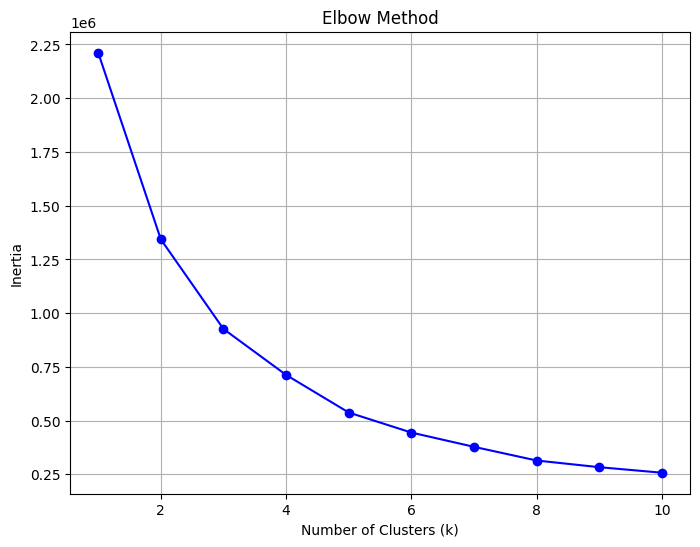

In [10]:
# Pilih atribut yang akan digunakan dalam analisis klaster
attributes = df[['avenger', 'to', 'bibi']]

# Inisialisasi daftar untuk menyimpan inertia (sum squared distances) untuk setiap k
inertia = []

# Mencoba jumlah klaster (k) dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(attributes)
    inertia.append(kmeans.inertia_)

# Memvisualisasikan elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


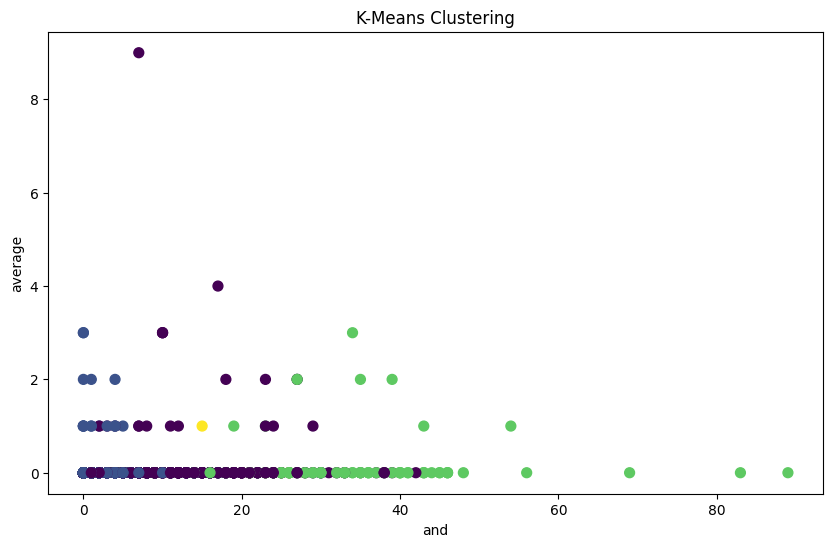

In [12]:
# Pilih atribut yang akan digunakan dalam K-Means Clustering
attributes = df[['avenger', 'to', 'bibi']]

# Membuat model K-Means Clustering dengan 5 klaster
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(attributes)

# Menambahkan kolom 'label' ke dataframe df
df['label'] = kmeans.labels_

# Memvisualisasikan hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(df['and'], df['average'], c=df['label'], cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('and')
plt.ylabel('average')
plt.show()

In [13]:
# Inisialisasi sebuah dictionary untuk menyimpan nilai Silhouette Score
silhouette_scores = {}

# Coba jumlah klaster (k) dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(attributes)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(attributes, labels)
    silhouette_scores[k] = silhouette_avg

# Menampilkan hasil Silhouette Score untuk masing-masing k
for k, score in silhouette_scores.items():
    print(f'Silhouette Score for k={k}: {score:.4f}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for k=2: 0.7729
Silhouette Score for k=3: 0.7420
Silhouette Score for k=4: 0.6576
Silhouette Score for k=5: 0.6453
Silhouette Score for k=6: 0.5602
Silhouette Score for k=7: 0.5588
Silhouette Score for k=8: 0.5595
Silhouette Score for k=9: 0.4803
Silhouette Score for k=10: 0.4831


In [14]:
# Inisialisasi sebuah list untuk menyimpan nilai Davies-Bouldin Index
dbi_scores = []

# Coba jumlah klaster (k) dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(attributes)
    labels = kmeans.labels_
    dbi = davies_bouldin_score(attributes, labels)
    dbi_scores.append(dbi)

# Menampilkan hasil Davies-Bouldin Index untuk masing-masing k
for k, score in zip(range(2, 11), dbi_scores):
    print(f'Davies-Bouldin Index for k={k}: {score:.4f}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index for k=2: 0.8936
Davies-Bouldin Index for k=3: 0.7749
Davies-Bouldin Index for k=4: 0.8038
Davies-Bouldin Index for k=5: 0.7392
Davies-Bouldin Index for k=6: 0.8564
Davies-Bouldin Index for k=7: 0.7502
Davies-Bouldin Index for k=8: 0.7226
Davies-Bouldin Index for k=9: 0.7986
Davies-Bouldin Index for k=10: 0.7864
